In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

filename = '/Users/roberto/data/RO-logging/maxEVecs-ro-dataset.csv';
print('Reading from: ' + filename)
df_maxEVecs = pd.read_csv(filename, names=range(2400))

[m,n] = shape(df_maxEVecs)

filename = '/Users/roberto/data/RO-logging/labels-ro-dataset.csv';
print('Reading from: ' + filename)
df_labels = pd.read_csv(filename, names=range(m))
labels = np.copy(df_labels.values)
labels = labels.T
print("Shape of max eigenvecs is:\n",shape(df_maxEVecs))
print("Shape of labels is:\n",shape(df_labels))

Reading from: /Users/roberto/data/RO-logging/maxEVecs-ro-dataset.csv
Reading from: /Users/roberto/data/RO-logging/labels-ro-dataset.csv
Shape of max eigenvecs is:
 (2023, 2400)
Shape of labels is:
 (1, 2023)


In [3]:
where_are_NaNs = isnan(df_maxEVecs)
df_maxEVecs[where_are_NaNs] = 0
df_maxEVecs.head()

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.055188,0.055134,0.054691,0.054660,0.054297,0.054235,0.054081,0.053936,0.053916,0.053564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048261,0.048193,0.047930,0.047750,0.047725,0.047575,0.047533,0.046977,0.046955,0.046932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046782,0.046761,0.046703,0.046670,0.046650,0.046623,0.046605,0.046600,0.046530,0.046512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048621,0.048156,0.047899,0.047863,0.047810,0.047751,0.047556,0.047522,0.047419,0.047178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.046599,0.046410,0.046399,0.046352,0.046250,0.046162,0.046136,0.045981,0.045935,0.045744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# rng_state = np.random.get_state()
# np.random.shuffle(df_maxEVecs)
# np.random.set_state(rng_state)
# np.random.shuffle(labels)

training_to_test_ratio = 0.8
split_index = int(training_to_test_ratio*m)
print("Split index is:\n",split_index,' out of ',m)

X_total = np.copy(df_maxEVecs.values)
y_total = np.copy(ravel(labels))

X_train = np.copy(df_maxEVecs.values[0:split_index,:])
y_train = np.copy(ravel(labels[0:split_index]))
eig_train = np.copy(df_maxEVecs.values[0:split_index,:])

X_test = np.copy(df_maxEVecs.values[split_index+1:m,:])
y_test = np.copy(ravel(labels[split_index+1:m]))
eig_test = np.copy(df_maxEVecs.values[split_index+1:m,:])

[m_train,n_train] = shape(X_train)
[m_test,n_test] = shape(X_test)
print("Size of training data is: \n",shape(X_train))
print("Size of test data is: \n",shape(X_test))

Split index is:
 1618  out of  2023
Size of training data is: 
 (1618, 2400)
Size of test data is: 
 (404, 2400)


In [5]:
label_colours = []   
test_colours = []
for i in range(m_train):
    if(y_train[i] == 1):
        label_colours.append('red')
    else:
        label_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        test_colours.append('red')
    else:
        test_colours.append('blue')

# plt.figure(figsize=(15,5))

# for i in range(m_train):
#     plt.subplot(121)
#     plt.plot(eig_train[i,:].T, color=label_colours[i]);
#     plt.title("Training data", fontsize=16)

# for i in range(m_test):
#     plt.subplot(122)
#     plt.plot(eig_test[i,:].T, color=test_colours[i]);
#     plt.title("Test data", fontsize=16)

In [10]:
from sklearn.svm import SVC

X = np.copy(X_train)
y = np.copy(ravel(y_train))

print(shape(X))
print(shape(y))

# SVM Classifier model
svm_clf = SVC(kernel="linear",class_weight='balanced', C=float(1000))
svm_clf.fit(X, y)

(1618, 2400)
(1618,)


SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# svm_clf.fit(X_scaled, y)

In [12]:
print('Testing on X data with shape: ',shape(X_test))
predictions = svm_clf.predict(X_test)
successes = 0

for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        successes+=1
        
print('Successes: ',successes,' out of ',len(y_test))
print('Classification accuracy = ',successes/len(y_test))

Testing on X data with shape:  (404, 2400)
Successes:  348  out of  404
Classification accuracy =  0.8613861386138614


/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


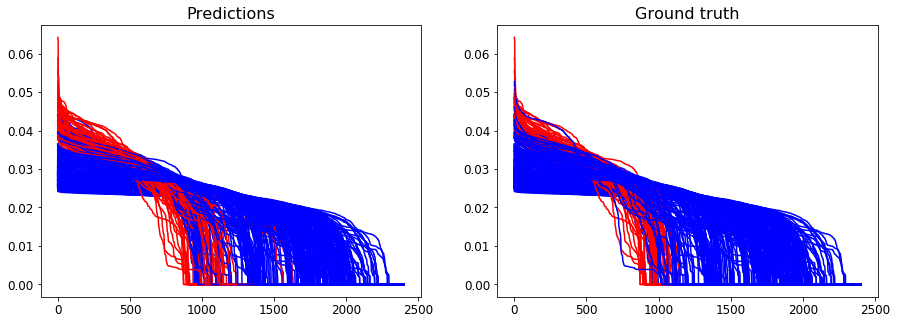

In [13]:
predict_colours = []
correct_colours = []
for i in range(m_test):
    if(predictions[i] == 1):
        predict_colours.append('red')
    else:
        predict_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        correct_colours.append('red')
    else:
        correct_colours.append('blue')

plt.figure(figsize=(15,5))
for i in range(m_test):
#     if(i%20 ==0):
        plt.subplot(121)
        plt.plot(eig_test[i,:].T, color=predict_colours[i]);
        plt.title("Predictions", fontsize=16)

        plt.subplot(122)
        plt.plot(eig_test[i,:].T, color=correct_colours[i]);
        plt.title("Ground truth", fontsize=16)